In [ ]:
!python -m spacy download en_core_web_sm

2023-08-16 04:10:49.418875: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 04:10:50.970038: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Elon_musk.csv to Elon_musk.csv


In [ ]:
Data=pd.read_csv("Elon_musk.csv",encoding='iso-8859-1')

In [ ]:
Data.head(20)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


In [ ]:
Data=Data.rename(columns={'Unnamed: 0':'TweetNumber'})

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TweetNumber  1999 non-null   int64 
 1   Text         1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


Data Text processing (converting to lowe case ,stemming and removing stopwords)

In [ ]:
stopwords = set(stopwords.words('english'))
stopwords.update(['im','ufuf', 'uf'])

In [ ]:
def preprocess(X):
  X=re.sub('[^a-zA-Z ]', '', X)
  X=X.lower()
  X=X.split()
  X=[word for word in X if word not in stopwords]
  X=[ps.stem(word) for word in X]
  X=" ".join(X)
  return X

In [ ]:
ps = PorterStemmer()

In [ ]:
Data['Text']=Data["Text"].apply(preprocess)

In [ ]:
Data.head(20)

,TweetNumber,Text
0,1,kunalb alien
1,2,idaacarmack ray trace cyberpunk hdr nextlevel tri
2,3,joerogan spotifi great interview
3,4,gtera doge underestim
4,5,teslacn congratul tesla china amaz execut last...
5,6,happi new year ox httpstcowfkmyuoj
6,7,frodo underdogeal thought would failhimself ht...
7,8,owenspark flcnhvi anonyx haha thank
8,9,flcnhvi anonyx inde tweet definit repres realw...
9,10,entertain outcom like


# Count Vectorizer

In [ ]:
a=np.array(Data['Text'])

In [ ]:
a

array(['kunalb alien',
       'idaacarmack ray trace cyberpunk hdr nextlevel tri',
       'joerogan spotifi great interview', ...,
       'teslagong ppathol samwis gamge', 'ppathol altho dumb dumber',
       'progress updat august'], dtype=object)

In [ ]:
cv=CountVectorizer(ngram_range=(1,1))
a=cv.fit_transform(a).toarray()
cv.vocabulary_

{'kunalb': 2441,
 'alien': 93,
 'idaacarmack': 2207,
 'ray': 3278,
 'trace': 4101,
 'cyberpunk': 784,
 'hdr': 1467,
 'nextlevel': 2864,
 'tri': 4119,
 'joerogan': 2364,
 'spotifi': 3741,
 'great': 1403,
 'interview': 2293,
 'gtera': 1422,
 'doge': 928,
 'underestim': 4217,
 'teslacn': 3954,
 'congratul': 687,
 'tesla': 3948,
 'china': 576,
 'amaz': 116,
 'execut': 1129,
 'last': 2460,
 'year': 4472,
 'next': 2863,
 'even': 1105,
 'happi': 1448,
 'new': 2860,
 'ox': 2998,
 'httpstcowfkmyuoj': 2073,
 'frodo': 1291,
 'underdogeal': 4216,
 'thought': 4026,
 'would': 4447,
 'failhimself': 1163,
 'httpstcozgxjfdzzrm': 2157,
 'owenspark': 2992,
 'flcnhvi': 1232,
 'anonyx': 144,
 'haha': 1434,
 'thank': 3989,
 'inde': 2249,
 'tweet': 4153,
 'definit': 835,
 'repres': 3352,
 'realworld': 3302,
 'time': 4044,
 'alloc': 96,
 'entertain': 1063,
 'outcom': 2973,
 'like': 2519,
 'givedirectli': 1369,
 'sent': 3538,
 'agre': 64,
 'clubhous': 619,
 'kanyewest': 2398,
 'httpstcorweuhst': 1965,
 'geoffk

In [ ]:
Z = cv.fit_transform(Data["Text"])
sum_words = Z.sum(axis=0)
words_frequency = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_frequency =sorted(words_frequency, key = lambda x: x[1], reverse=True)
df = pd.DataFrame(words_frequency)
df.columns = ['Words', 'Count']

df[0:10]

,Words,Count
0,spacex,249
1,amp,218
2,tesla,170
3,erdayastronaut,142
4,rt,127
5,ppathol,123
6,flcnhvi,114
7,ye,87
8,great,76
9,teslaownerssv,73


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='Words'>

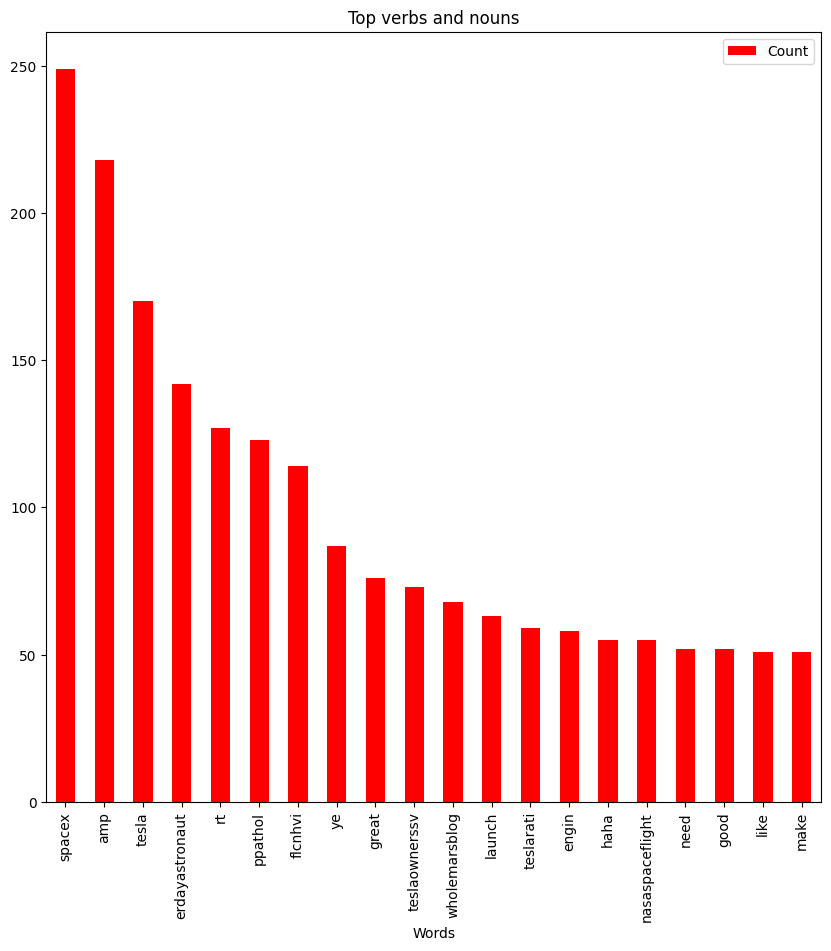

In [ ]:
df[0:20].plot.bar(x='Words', figsize=(10,10), title='Top verbs and nouns',color='red')

In [ ]:
cv.get_feature_names_out()

array(['aber', 'abl', 'abo', ..., 'zubinanari', 'zwiebelbach', 'zzcool'],
      dtype=object)

In [ ]:
cv.analyzer

'word'

In [ ]:
a=pd.DataFrame(a,columns=cv.get_feature_names_out())

In [ ]:
a

,aber,abl,abo,aboard,abort,absenc,absolut,absorb,absorpt,absurd,...,zero,zikryzamir,zip,zogfotpik,zon,zone,zshauladventur,zubinanari,zwiebelbach,zzcool
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF


In [ ]:
b=np.array(Data["Text"])

In [ ]:
tv=TfidfVectorizer()
b=tv.fit_transform(b).toarray()
tv.vocabulary_

{'kunalb': 2441,
 'alien': 93,
 'idaacarmack': 2207,
 'ray': 3278,
 'trace': 4101,
 'cyberpunk': 784,
 'hdr': 1467,
 'nextlevel': 2864,
 'tri': 4119,
 'joerogan': 2364,
 'spotifi': 3741,
 'great': 1403,
 'interview': 2293,
 'gtera': 1422,
 'doge': 928,
 'underestim': 4217,
 'teslacn': 3954,
 'congratul': 687,
 'tesla': 3948,
 'china': 576,
 'amaz': 116,
 'execut': 1129,
 'last': 2460,
 'year': 4472,
 'next': 2863,
 'even': 1105,
 'happi': 1448,
 'new': 2860,
 'ox': 2998,
 'httpstcowfkmyuoj': 2073,
 'frodo': 1291,
 'underdogeal': 4216,
 'thought': 4026,
 'would': 4447,
 'failhimself': 1163,
 'httpstcozgxjfdzzrm': 2157,
 'owenspark': 2992,
 'flcnhvi': 1232,
 'anonyx': 144,
 'haha': 1434,
 'thank': 3989,
 'inde': 2249,
 'tweet': 4153,
 'definit': 835,
 'repres': 3352,
 'realworld': 3302,
 'time': 4044,
 'alloc': 96,
 'entertain': 1063,
 'outcom': 2973,
 'like': 2519,
 'givedirectli': 1369,
 'sent': 3538,
 'agre': 64,
 'clubhous': 619,
 'kanyewest': 2398,
 'httpstcorweuhst': 1965,
 'geoffk

In [ ]:
b=pd.DataFrame(b,columns=tv.get_feature_names_out())
b

,aber,abl,abo,aboard,abort,absenc,absolut,absorb,absorpt,absurd,...,zero,zikryzamir,zip,zogfotpik,zon,zone,zshauladventur,zubinanari,zwiebelbach,zzcool
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
b.shape

(1999, 4505)

In [ ]:
affin=Data["Text"]

# Sentimental Analysis

In [ ]:
Data["Text"]

0                                            kunalb alien
1       idaacarmack ray trace cyberpunk hdr nextlevel tri
2                        joerogan spotifi great interview
3                                   gtera doge underestim
4       teslacn congratul tesla china amaz execut last...
                              ...                        
1994    flcnhvi true sound surreal neg propaganda stil...
1995    ppathol make sure read ur term amp condit clic...
1996                       teslagong ppathol samwis gamge
1997                            ppathol altho dumb dumber
1998                                progress updat august
Name: Text, Length: 1999, dtype: object

# Vader Lexicon

In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#from nltk.sentiment.vader import SentimentIntensityAnalyzer as sia

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
def get_vader_sentiment(letter):

  sia=SentimentIntensityAnalyzer()
  # create text blob object of passed tweet text
  analysis=sia.polarity_scores(letter)
  # set sentiment
  if analysis["compound"]>0:
    return "posistive statement"
  elif analysis["compound"]<0:
    return "negative statement"
  else:
    return "neutral"

In [ ]:
sentiment=pd.DataFrame()


In [ ]:
sentiment["sentiment"]=Data["Text"].apply(get_vader_sentiment)

In [ ]:
Data["Sentiment"] = Data["Text"].apply(get_vader_sentiment)

In [ ]:
sia=SentimentIntensityAnalyzer()

In [ ]:
Data['scores']=Data['Text'].apply(lambda letter: sia.polarity_scores(letter))

In [ ]:
Data['compound']=Data['scores'].apply(lambda scores: scores['compound'])

In [ ]:
Data['comp_score'] = Data['compound'].apply(lambda comp: 'positive statement' if comp > 0 else ('negative statement' if comp < 0 else 'neutral'))

In [ ]:
Data['scores']

0       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                              ...                        
1994    {'neg': 0.135, 'neu': 0.676, 'pos': 0.189, 'co...
1995    {'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compou...
1996    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1997    {'neg': 0.744, 'neu': 0.256, 'pos': 0.0, 'comp...
1998    {'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...
Name: scores, Length: 1999, dtype: object

In [ ]:
Data['compound']

0       0.0000
1       0.0000
2       0.6249
3       0.0000
4       0.0000
         ...  
1994    0.2023
1995    0.5994
1996    0.0000
1997   -0.7003
1998    0.4215
Name: compound, Length: 1999, dtype: float64

Text(0.5, 1.0, 'Sentiment plot for each Tweets')

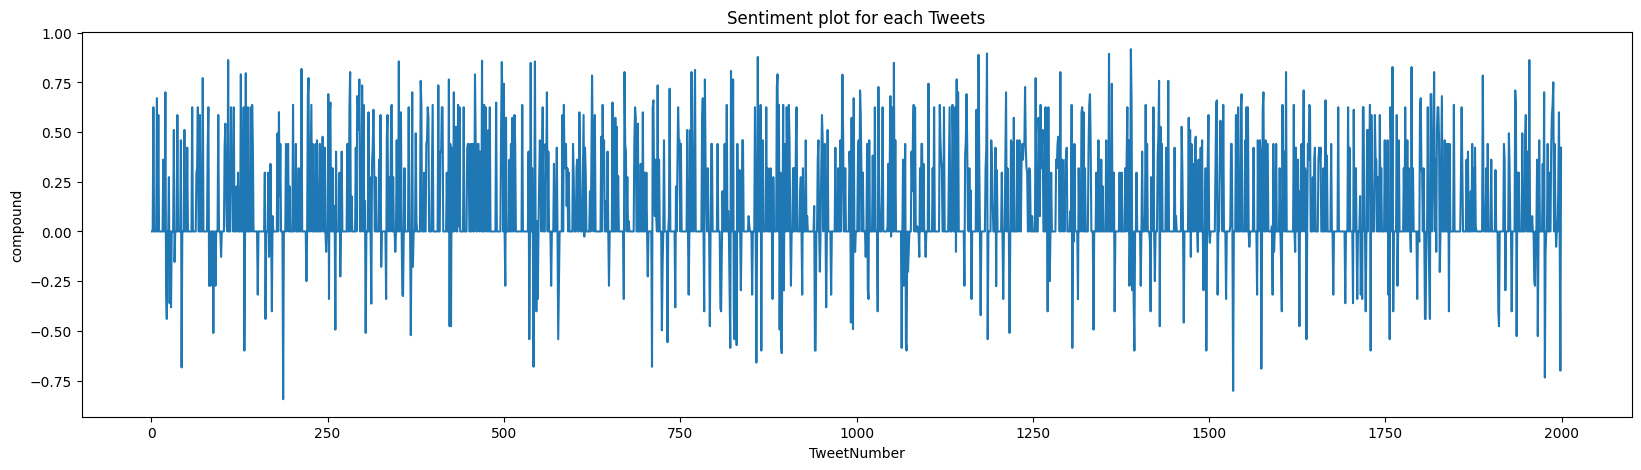

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(y='compound',x='TweetNumber',data=Data)
plt.title("Sentiment plot for each Tweets")

In [ ]:
sentiment.head(10)

,sentiment
0,neutral
1,neutral
2,posistive statement
3,neutral
4,neutral
5,neutral
6,neutral
7,posistive statement
8,neutral
9,posistive statement


In [ ]:
sentiment_data=sentiment['sentiment']

In [ ]:
sentiment_counts = pd.Series(sentiment_data).value_counts()

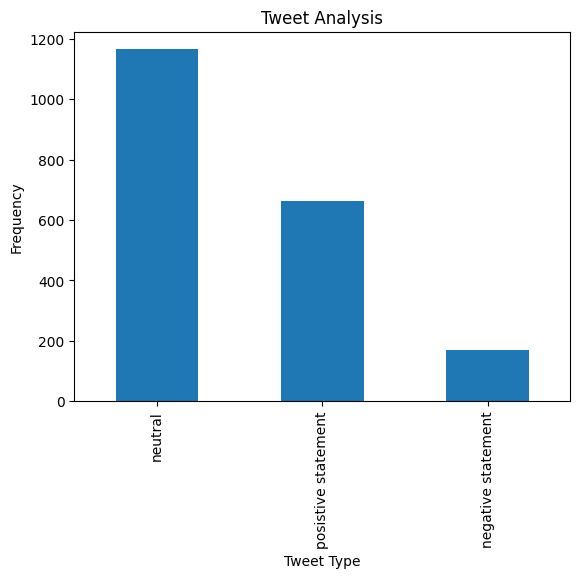

In [ ]:
ax = sentiment_counts.plot.bar()
ax.set_xlabel('Tweet Type')
ax.set_ylabel('Frequency')
ax.set_title('Tweet Analysis')
plt.show()

In [ ]:
Data["Text"]

0                                            kunalb alien
1       idaacarmack ray trace cyberpunk hdr nextlevel tri
2                        joerogan spotifi great interview
3                                   gtera doge underestim
4       teslacn congratul tesla china amaz execut last...
                              ...                        
1994    flcnhvi true sound surreal neg propaganda stil...
1995    ppathol make sure read ur term amp condit clic...
1996                       teslagong ppathol samwis gamge
1997                            ppathol altho dumb dumber
1998                                progress updat august
Name: Text, Length: 1999, dtype: object

In [ ]:
Data.head(10)

,TweetNumber,Text,Sentiment,scores,compound,comp_score
0,1,kunalb alien,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,2,idaacarmack ray trace cyberpunk hdr nextlevel tri,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,3,joerogan spotifi great interview,posistive statement,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...",0.6249,positive statement
3,4,gtera doge underestim,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
4,5,teslacn congratul tesla china amaz execut last...,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
5,6,happi new year ox httpstcowfkmyuoj,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
6,7,frodo underdogeal thought would failhimself ht...,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
7,8,owenspark flcnhvi anonyx haha thank,posistive statement,"{'neg': 0.0, 'neu': 0.353, 'pos': 0.647, 'comp...",0.6705,positive statement
8,9,flcnhvi anonyx inde tweet definit repres realw...,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
9,10,entertain outcom like,posistive statement,"{'neg': 0.0, 'neu': 0.172, 'pos': 0.828, 'comp...",0.5859,positive statement


# From TWEETS we can conclude that he spoke more about Spacex

In [ ]:
print(accuracy_score(Data["Sentiment"],Data['comp_score']))

0.6683341670835418


# Word Cloud

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");


In [ ]:
'uf' in stopwords

True

In [ ]:
'ufuf' in stopwords

True

In [ ]:
'im' in stopwords

True

In [ ]:
#the above words we can update to stopwords

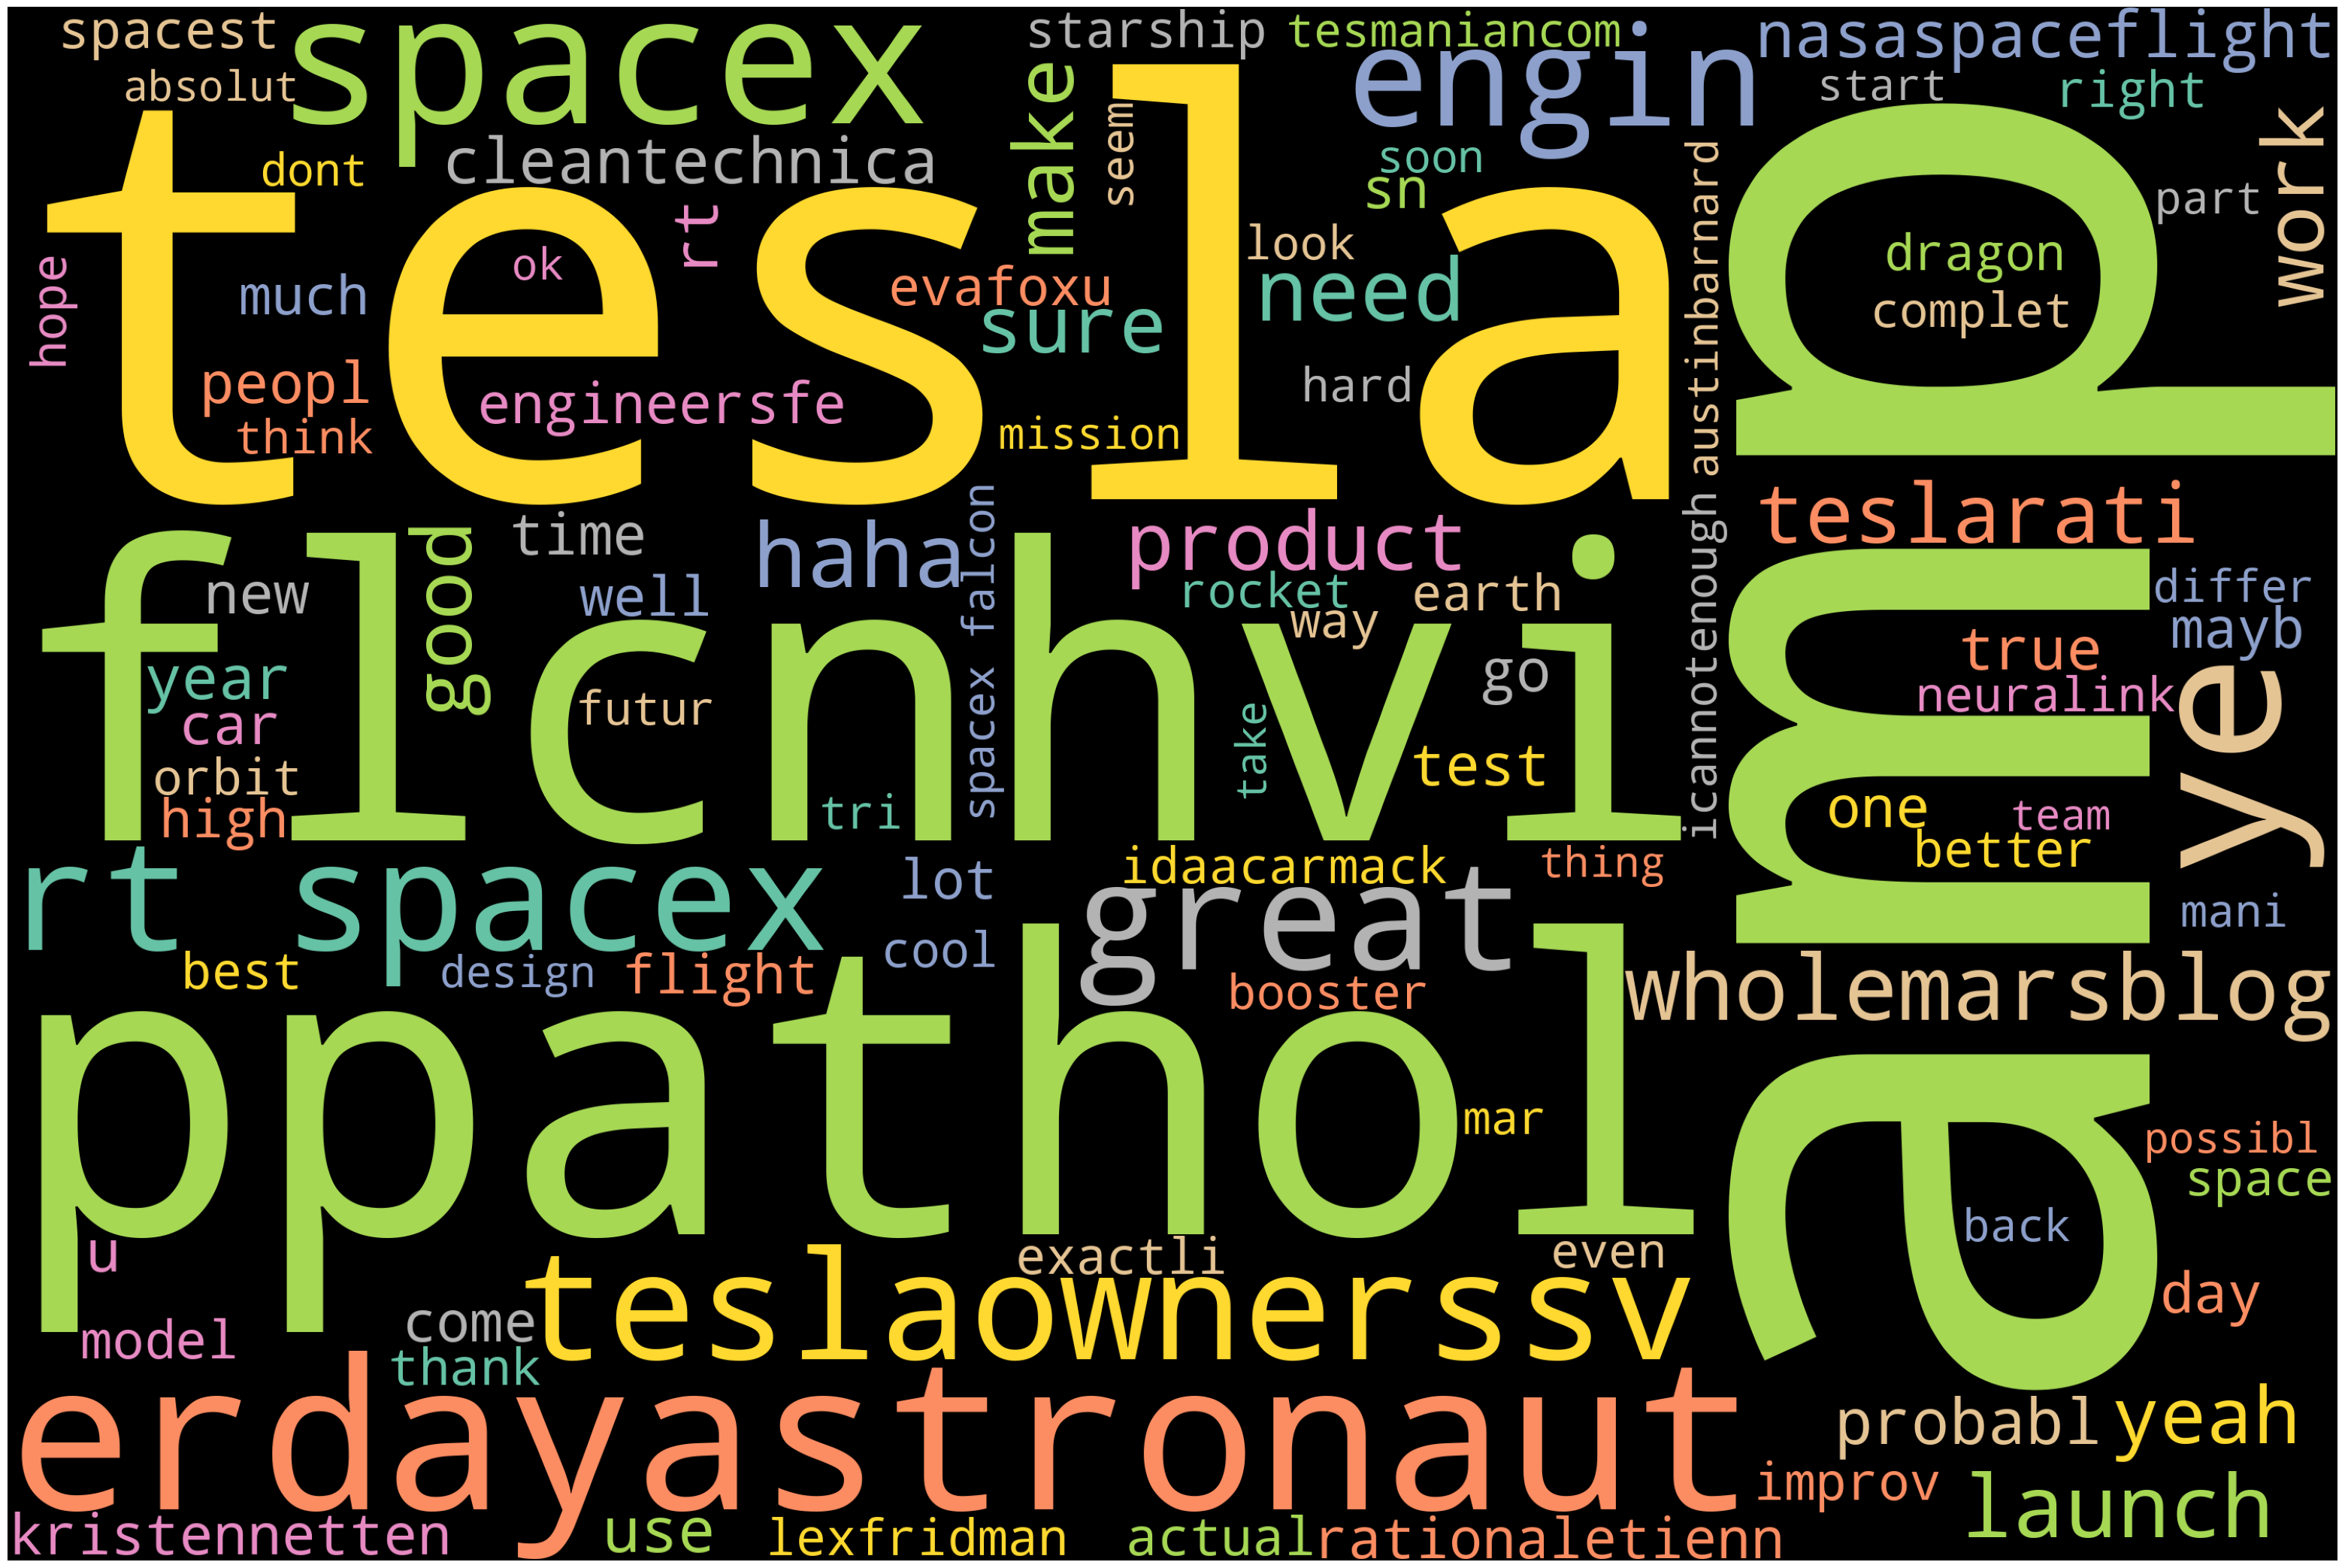

In [ ]:
word = np.array(Data["Text"])
word = word.astype(str)  # convert to string type
stopwords = set(STOPWORDS)
stopwords.update(['im','ufuf', 'uf'])
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(' '.join(word))
plot_cloud(wordcloud)

# MODEL BUILDING

In [ ]:
# importing Libraries

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import statsmodels.api as sm

In [ ]:
label=LabelEncoder()
score=label.fit_transform(Data["comp_score"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(b ,score, test_size = 0.3)

In [ ]:
X_train

,aber,abl,abo,aboard,abort,absenc,absolut,absorb,absorpt,absurd,...,zero,zikryzamir,zip,zogfotpik,zon,zone,zshauladventur,zubinanari,zwiebelbach,zzcool
1840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train

array([2, 1, 1, ..., 2, 2, 2])

In [ ]:
models=[DecisionTreeClassifier(random_state=10),LogisticRegression(),RandomForestClassifier(n_estimators=100)]
for model in models:
    model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    print(model,"accuracy ::",accuracy_score(y_test,y_test_pred))
    print(classification_report(y_test,y_test_pred))
    print(confusion_matrix(y_test,y_test_pred))
    print("=="*10)
    print()

DecisionTreeClassifier(random_state=10) accuracy :: 0.8883333333333333
              precision    recall  f1-score   support

           0       0.59      0.48      0.53        42
           1       0.90      0.96      0.93       372
           2       0.93      0.84      0.88       186

    accuracy                           0.89       600
   macro avg       0.80      0.76      0.78       600
weighted avg       0.89      0.89      0.88       600

[[ 20  19   3]
 [  6 357   9]
 [  8  22 156]]

LogisticRegression() accuracy :: 0.795
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.76      1.00      0.86       372
           2       0.97      0.57      0.72       186

    accuracy                           0.80       600
   macro avg       0.58      0.52      0.53       600
weighted avg       0.77      0.80      0.76       600

[[  0  40   2]
 [  0 371   1]
 [  0  80 106]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier() accuracy :: 0.87
              precision    recall  f1-score   support

           0       0.91      0.24      0.38        42
           1       0.83      1.00      0.91       372
           2       0.98      0.76      0.85       186

    accuracy                           0.87       600
   macro avg       0.91      0.66      0.71       600
weighted avg       0.88      0.87      0.85       600

[[ 10  30   2]
 [  0 371   1]
 [  1  44 141]]



# From above model Random forest classifeir perform better than other model